# Introduction

This tutorial will attempt to show you how to scrape data from the University of Maryland course catalog, clean that data, analyze it, and visualize it. 

In [1]:
#DEBUGGING
import os

def Beep():
   
    os.system("printf '\a'")

# Tools You Need

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

%matplotlib inline

# Data Collection: Scraping the Data

In order to begin scraping, we use the requests library which is very easy to get started with. As seen below, you simply plug in the url and then you can access the html through the .text() method.
<br>
The url that we are accessing is the main landing page for the UMD course catalog. The strategy for this tutorial will be to first scrape the landing page to create a list of colleges. Then use the list of colleges

In [3]:
result = requests.get('https://ntst.umd.edu/soc/201708')
result.status_code

200

Starting off getting list of colleges.

To start, you will need to load the url pages of the classes. But before that, we will need to be able to iterate through all of the classes. And in order to do that we need a list of all of the colleges.
<br>
Now that we have the html of the desired page, we use the BeautifulSoup library to convert it into a much more easily accessible format. BeautifulSoup has tons of great methods that make things like finding all of the links on a page, or extracting the id from an element, and much more very easy.
<br>
If you would like to learn more, check out their documentation. It is pretty accessible as far as documentation goes.
<br>
https://www.crummy.com/software/BeautifulSoup/bs4/doc/

In [4]:
soup = BeautifulSoup(str(result.text), 'html.parser')

college_list = []

for link in soup.find_all(class_='clearfix'):
    
    href = link.get('href')
    if(href is None):
        continue
    curr_college = href[7:11]
    
    college_list.append(curr_college)

print(college_list)

['AASP', 'AAST', 'AGNR', 'AMSC', 'AMST', 'ANSC', 'ANTH', 'AOSC', 'ARAB', 'ARCH', 'AREC', 'ARHU', 'ARMY', 'ARSC', 'ARTH', 'ARTT', 'ASTR', 'BCHM', 'BIOE', 'BIOL', 'BIOM', 'BIPH', 'BISI', 'BMGT', 'BSCI', 'BSCV', 'BSGC', 'BSOS', 'BSST', 'BUAC', 'BUDT', 'BUFN', 'BULM', 'BUMK', 'BUMO', 'BUSI', 'BUSM', 'CBMG', 'CCJS', 'CHBE', 'CHEM', 'CHIN', 'CHPH', 'CLAS', 'CLFS', 'CMLT', 'CMSC', 'COMM', 'CONS', 'CPBE', 'CPET', 'CPGH', 'CPJT', 'CPMS', 'CPPL', 'CPSA', 'CPSD', 'CPSF', 'CPSG', 'CPSN', 'CPSP', 'CPSS', 'DANC', 'EALL', 'ECON', 'EDCI', 'EDCP', 'EDHD', 'EDHI', 'EDMS', 'EDPS', 'EDSP', 'EDUC', 'ENAE', 'ENCE', 'ENCH', 'ENCO', 'ENEE', 'ENES', 'ENFP', 'ENGL', 'ENMA', 'ENME', 'ENPM', 'ENPP', 'ENRE', 'ENSE', 'ENSP', 'ENST', 'ENTM', 'ENTS', 'EPIB', 'FGSM', 'FILM', 'FIRE', 'FMSC', 'FREN', 'GEMS', 'GEOG', 'GEOL', 'GERM', 'GREK', 'GVPT', 'HACS', 'HDCC', 'HEBR', 'HEIP', 'HESI', 'HESP', 'HHUM', 'HISP', 'HIST', 'HLMN', 'HLSA', 'HLSC', 'HLTH', 'HONR', 'IDEA', 'IMMR', 'INAG', 'INFM', 'INST', 'ISRL', 'ITAL', 'JAPN',

Next up, use the list of colleges to create lists of all of the umd courses.
<br>
However, if you just go to each college website to get list of courses you have to push a toggle section button in order to make the section information appear in the html.
<br>
Thankfully there is a quick workaround with the cost of inefficiency.
<br>
We can create a list of all of the courses, then visit their individual website which thankfully automatically has the sections toggled, so the information is available in the html. As said before, this is inefficient because we essentially have to make two passes over the data, however it is a small price to pay for this fix to the problem. In addition, once we have the data we can load it into a dataframe, or export to a csv file so that we don't have to keep making requests to the UMD servers.

In [5]:
courses_list = []

for i in range(len(college_list)):
#     if i == 8:
        college_classes_url = 'https://ntst.umd.edu/soc/201708/' + college_list[i];
#         print(course_url)
        
        result = requests.get(college_classes_url)
#         print(result.status_code)
        soup = BeautifulSoup(str(result.text), 'html.parser')

#         print(soup.prettify())

        k = 0
        for course_tag in soup.find_all(class_='course'):
            curr_course = course_tag['id']
            courses_list.append(curr_course)
#             print (course_tag['id'])


print(courses_list)

['AASP100', 'AASP100H', 'AASP101', 'AASP187', 'AASP189I', 'AASP200', 'AASP202', 'AASP202H', 'AASP274', 'AASP297', 'AASP298B', 'AASP298C', 'AASP298L', 'AASP298V', 'AASP301', 'AASP313', 'AASP314', 'AASP386', 'AASP395', 'AASP396', 'AASP397', 'AASP398Q', 'AASP400', 'AASP400H', 'AASP498O', 'AASP498T', 'AASP499A', 'AASP499P', 'AAST200', 'AAST201', 'AAST222', 'AAST298A', 'AAST378', 'AAST388', 'AAST398B', 'AAST398D', 'AAST398E', 'AAST398F', 'AAST398L', 'AAST443', 'AAST498D', 'AAST498I', 'AAST498J', 'AAST498M', 'AGNR200', 'AGNR270', 'AGNR301', 'AGNR388', 'AGNR489', 'AGNR499', 'AMSC460', 'AMSC466', 'AMSC498A', 'AMSC660', 'AMSC662', 'AMSC663', 'AMSC666', 'AMSC670', 'AMSC673', 'AMSC689', 'AMSC714', 'AMSC760', 'AMSC762', 'AMSC763', 'AMSC799', 'AMSC808A', 'AMSC898', 'AMSC899', 'AMST101', 'AMST202', 'AMST203', 'AMST204', 'AMST205', 'AMST260', 'AMST298C', 'AMST298I', 'AMST298Q', 'AMST328E', 'AMST328J', 'AMST328L', 'AMST340', 'AMST386', 'AMST388', 'AMST398', 'AMST418H', 'AMST418O', 'AMST428D', 'AMST429

Now that we have a list of all of the courses in the catalog, we can visit the individual course urls and scrape the data much more easily.
<br>
In this next step, we will extract out just what we need from the html and put it into a much more manageable pandas dataframe.
<br>
The values extracted will be the course name, building, section number, and times it meets.

We will start by creating our pandas dataframe.

In [6]:
cols = list(['Course', 'Section', 'Building Code', 'Room Number', 'Meeting Days', 'Start Time', 'Finish Time'])

main_df = pd.DataFrame(index=[], columns=cols)


 #For each section, pull out desired dataID
        # Section Number
        # Building Code
        # Room Number
        #meeting days
        # Start Time
        # End Time

In [7]:
counter = 0 

for i in range(len(courses_list)):
    counter = counter + 1
    curr_course = courses_list[i]
    associated_college = curr_course[0:4]

    #construct url from associated college and course.
    course_url ='https://ntst.umd.edu/soc/201708/' + associated_college + '/' + curr_course

    result = requests.get(course_url)

    soup = BeautifulSoup(str(result.text), 'html.parser')

    #Course Id is just curr_course
    course_id = curr_course

    #We only want to look at the first result because sometimes classes have the same course number, with a different letter
    #An example is AASP100 and AASP100H. They both show up when you query the course_url. By only using the html from the first
    #one we avoid any accidental overlap of section information.

    course_html = soup.find_all(class_='course')

    #This occurs at EDSP789 and a few other courses. They have no section area at all.
    #Instead it says Contact department for information to register for this course.
    if(len(course_html) == 0):
        continue

    desired_course = course_html[0]

    desired_course_soup = BeautifulSoup(str(desired_course), "html5lib")
    sections = desired_course_soup.find_all(class_='section delivery-f2f')

    k = 0
    for sec in sections:
            raw_attribute_list = []
            filtered_attribute_list = []
            breakout = False

            #convert it back into a beautiful soup
            new_soup = BeautifulSoup(str(sec), "html5lib")
            
            section_ids = new_soup.find_all(class_='section-id')
            
            building_codes = new_soup.find_all(class_='building-code')                
            raw_attribute_list.append(building_codes)
            room_numbers = new_soup.find_all(class_='class-room')
            raw_attribute_list.append(room_numbers)
            meeting_days = new_soup.find_all(class_='section-days')
            raw_attribute_list.append(meeting_days)

            start_times = new_soup.find_all(class_='class-start-time')
            raw_attribute_list.append(start_times)

            finish_times = new_soup.find_all(class_='class-end-time')
            raw_attribute_list.append(finish_times)


            #This checks if there is an exception such as a field that does not have data
            #in the format that we need. Thus it is not entered into the list.
            #An example of this is AAST378, because it is missing meeting days,
            #start/finish times, and location. Instead it says contact department
            #or instructor for details. I suspect that the number of these occurences is small in
            #comparison to the size of the dataset. Even if we don't include them, we should still be able to build a useful
            #dataset that can give us insight on course meeting times.
            for i in range(len(raw_attribute_list)):
                if(len(raw_attribute_list[i]) == 0):
                    breakout = True
                    break
                else:
                    filtered_attribute_list.append(raw_attribute_list[i])

            if(breakout == True):
                breakout = False
                continue

            temp_list = [curr_course, section_ids[0].text.strip(), building_codes[0].text.strip(), room_numbers[0].text.strip(), \
                        meeting_days[0].text.strip(), start_times[0].text.strip(), finish_times[0].text.strip()]
            temp_df = pd.DataFrame([temp_list], columns=cols)
            main_df = main_df.append(temp_df, ignore_index=True)

            k=k+1

Beep()
print(counter)
main_df.head()

4497


,Course,Section,Building Code,Room Number,Meeting Days,Start Time,Finish Time
0,AASP100,0101,WDS,1114,MWF,10:00am,10:50am
1,AASP100,0201,TYD,1101,MWF,12:00pm,12:50pm
2,AASP100,0301,LEF,1201,TuTh,9:30am,10:45am
3,AASP100,0401,HBK,0109,TuTh,12:30pm,1:45pm
4,AASP100,0501,SYM,0215,TuTh,11:00am,12:15pm


In [8]:
main_df.head()

,Course,Section,Building Code,Room Number,Meeting Days,Start Time,Finish Time
0,AASP100,0101,WDS,1114,MWF,10:00am,10:50am
1,AASP100,0201,TYD,1101,MWF,12:00pm,12:50pm
2,AASP100,0301,LEF,1201,TuTh,9:30am,10:45am
3,AASP100,0401,HBK,0109,TuTh,12:30pm,1:45pm
4,AASP100,0501,SYM,0215,TuTh,11:00am,12:15pm


Before we can begin to analyze the data, we have to tidy it up a bit first.

In [10]:
#Before moving forward, it is a good idea to backup our pandas dataframe to a csv file so that we don't have to keep querying
#the UMD course catalog more than we need to. Also, we can quickly refresh it when reloading the file instead of having
#to wait a long time.

main_df.to_csv('course_data')

In [11]:
#We can easily read the file back in with the syntax below
main_df = pd.read_csv("course_data.csv")

# Data Processing: Cleaning the Data 

So the data has been scraped and is in a nice pandas dataframe, but there are still a few things left to do before we can analyze the data. 
<br>
For starters, we will break the days into separate rows, with the day spelt out fully.

In [12]:
#Next up, further break up courses into individual days to simplify logic further on.

cols = list(['Course', 'Section', 'Building Code', 'Room Number', 'Meeting Days', 'Start Time', 'Finish Time'])

further_df = pd.DataFrame(index=[], columns=cols)

In [13]:
prev_sub = ""
for index,row in main_df.iterrows():
    if True:
        
        #The code below iterates through the string, with an example string being MWF or TuTH.
        #The capital letters differentiate the start of the actual days, while the lowercase letters help to
        #differentiate tuesday from thursday, and saturday from sunday.
        #The code looks for capital letters first. If it can't find them, then it looks
        #back at the previous letter to figure out the day.
        for sub in row['Meeting Days']:
            if(sub.isupper() and sub != "T" and sub != "S"):
                if(sub == 'M'):
                    mini_list = [row[1], row[2],row[3],row[4],"Monday",row[6],row[7]]
                    df2 = pd.DataFrame([mini_list], columns=cols)
                    further_df = further_df.append(df2, ignore_index=True)
                if(sub == 'W'):
                    mini_list = [row[1], row[2],row[3],row[4],"Wednesday",row[6],row[7]]
                    df2 = pd.DataFrame([mini_list], columns=cols)
                    further_df = further_df.append(df2, ignore_index=True)
                if(sub == 'F'):
                    mini_list = [row[1], row[2],row[3],row[4],"Friday",row[6],row[7]]
                    df2 = pd.DataFrame([mini_list], columns=cols)
                    further_df = further_df.append(df2, ignore_index=True)
            else:
                if(prev_sub == 'T'):
                    if((prev_sub + sub) == "Th"):
                        mini_list = [row[1], row[2],row[3],row[4],"Thursday",row[6],row[7]]
                        df2 = pd.DataFrame([mini_list], columns=cols)
                        further_df = further_df.append(df2, ignore_index=True)
                    if((prev_sub + sub) == "Tu"):
                        mini_list = [row[1], row[2],row[3],row[4],"Tuesday",row[6],row[7]]
                        df2 = pd.DataFrame([mini_list], columns=cols)
                        further_df = further_df.append(df2, ignore_index=True)
                elif(prev_sub == 'S'):
                    if((prev_sub + sub) == "Sa"):
                        mini_list = [row[1], row[2],row[3],row[4],"Saturday",row[6],row[7]]
                        df2 = pd.DataFrame([mini_list], columns=cols)
                        further_df = further_df.append(df2, ignore_index=True)
                    
                    if((prev_sub + sub) == "Su"):
                        mini_list = [row[1], row[2],row[3],row[4],"Sunday",row[6],row[7]]
                        df2 = pd.DataFrame([mini_list], columns=cols)
                        further_df = further_df.append(df2, ignore_index=True)
      
            prev_sub = sub
further_df.head()

,Course,Section,Building Code,Room Number,Meeting Days,Start Time,Finish Time
0,AASP100,0101,WDS,1114,Monday,10:00am,10:50am
1,AASP100,0101,WDS,1114,Wednesday,10:00am,10:50am
2,AASP100,0101,WDS,1114,Friday,10:00am,10:50am
3,AASP100,0201,TYD,1101,Monday,12:00pm,12:50pm
4,AASP100,0201,TYD,1101,Wednesday,12:00pm,12:50pm


Now that the dates are split up, let's turn the times into floats to make them easier to manipulate. 
<br>
We will be using the re library which gives you access to regex, which are very powerful search tools.
<br>
It is hard to explain the power of regex in a few words, so if you would like to learn more, visit
<br>
https://docs.python.org/3/howto/regex.html
<br>
In addition, I would highly recommend using a regex python simulator if you want to use regex. It will make things much easier to get started. Here is the one that I used
<br>
http://www.pyregex.com/

In [14]:
#Here we need to split the time strings into 2 pieces to each be handled separately.
#The first part is the hour, the next is the minutes and the am or pm part.

#I won't go into too much detail here about regexes other than to say that 
#they are like a much more powerful version of when you use ctrl+f on a website to find something.

hour_matcher = re.compile('^[^\:]*')

rest_matcher = re.compile(':(\S*)')

#Because the logic below needed to be called for start and finish time,
#it made sense to create a function. It takes in the input_time in the form of
#HH:MMAM or HH:MMPM where HH is the hour portion, and MM is the minute portion.
#It converts that time input into a float output.
#An example would be 10:00am becomes 10. 10:45 am becomes 10.75.
#1 pm becomes 13, etc.
def convert_time_to_float(input_time):
    hour_piece = hour_matcher.match(input_time)
        
    hours = hour_piece.group()
    int_hours = int(hours)

    rest_piece = rest_matcher.search(input_time)

    exact_rest = rest_piece.group(1)

    minutes = exact_rest[0:2]
    int_minutes = int(minutes)
    time_switcher = exact_rest[2:4]
    final_minutes = int_minutes / 60

    if(time_switcher == "pm" and int_hours != 12):
        final_hours = int_hours + 12
    else:
        final_hours = int_hours


    final_total_time = final_hours + final_minutes
    
    return final_total_time

for index,row in further_df.iterrows():
    if True:
        start_time = row['Start Time']
        finish_time = row['Finish Time']
        
        conv_start = convert_time_to_float(start_time)
        conv_finish = convert_time_to_float(finish_time)
        
        further_df.set_value(index,'Start Time', conv_start)
        further_df.set_value(index,'Finish Time', conv_finish)

further_df.head()

,Course,Section,Building Code,Room Number,Meeting Days,Start Time,Finish Time
0,AASP100,0101,WDS,1114,Monday,10,10.8333
1,AASP100,0101,WDS,1114,Wednesday,10,10.8333
2,AASP100,0101,WDS,1114,Friday,10,10.8333
3,AASP100,0201,TYD,1101,Monday,12,12.8333
4,AASP100,0201,TYD,1101,Wednesday,12,12.8333


# Exploratory analysis & Data viz

The rows have been split so that days are on their own separate rows. 
<br>
In addition, the start and finish times have been converted to military time floats, which
should make working with them much easier.
<br>
The next step is to start asking questions, and trying to see what answers, if any, you can interpret from the data
<br>
For this tutorial, the main question is the following:
<br>
How often are the classrooms on campus used? By that I mean, of the time between 8 am to 6 pm (what I consider to be peak hours), how many classrooms sit vacant and unused, and for how long?

In [15]:
#To attempt to answer this question, we will build a dataframe that holds buildings, days, and counters for how many 
#empty classrooms there are for certain time intervals.

build_cols = list(['Building Code', 'Day', 'Empty 8 to 9', 'Empty 9 to 10','Empty 10 to 11','Empty 11 to 12','Empty 12 to 13', \
                   'Empty 13 to 14','Empty 14 to 15','Empty 15 to 16','Empty 16 to 17','Empty 17 to 18',])

building_df = pd.DataFrame(index=[], columns=build_cols)

In [16]:
group_by_Building_bins = further_df.groupby('Building Code', as_index=False)

for name,group in group_by_Building_bins:
    
    group_by_days_bins = group.groupby('Meeting Days', as_index=False)
    
    #Initialize the buiilding dataframe with zeroes in its columns for easier manipulation later.
    for name3,group3 in group_by_days_bins:
        mini_list = [name, name3, 0,0,0,0,0,0,0,0,0,0]
        df3 = pd.DataFrame([mini_list], columns=build_cols)
        building_df = building_df.append(df3, ignore_index=True)
        
building_df.head()

,Building Code,Day,Empty 8 to 9,Empty 9 to 10,Empty 10 to 11,Empty 11 to 12,Empty 12 to 13,Empty 13 to 14,Empty 14 to 15,Empty 15 to 16,Empty 16 to 17,Empty 17 to 18
0,ANA,Monday,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ANA,Thursday,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ANA,Tuesday,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ANA,Wednesday,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ANS,Friday,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
k = 0
for name,group in group_by_Building_bins: 
#     print(k)
    k = k + 1
    if True:
        group_by_room_num_bins = group.groupby('Room Number', as_index=False)
        
        for name2,group2 in group_by_room_num_bins:
            group_by_days_bins = group2.groupby('Meeting Days', as_index=False)
            
            for name3,group3 in group_by_days_bins:
                if True:
                    #Iterate through 8 am to 6 pm, figure out which hours the room is free during.
                    #Add to counter in building dataframe
                    
                    for i in range(8,18):
                        free = True
                        counter = 0
                        
                        for index, row in group3.iterrows():
                            if((row['Start Time'] < i + 1) and (row['Start Time'] >= i)):
                                #do nothing
                                free = False
                                continue
                            elif((row['Start Time'] < i + 1) and (row['Finish Time'] > i)):
                                #do nothing
                                free = False
                                continue
                            
                            counter = counter + 1
                            
                            #If we reach the end, and free is still True, that means the classroom is available
                            #and not in use during the designated hours.
                            if((counter == len(group3) - 1) and free == True):
                                
                                temp_str = 'Empty ' + str(i) + ' to ' + str(i + 1)
                    
                                selected_rows = building_df.loc[ (building_df['Building Code'] == row['Building Code']) & (building_df['Day'] == row['Meeting Days'])]
                                curr_row = selected_rows[0:1]
                                #get index
                                bld_index = curr_row.index.values[0]
                                test2 = int(curr_row[temp_str]) + 1

                                building_df.set_value(bld_index,temp_str, test2)
                                #if this is reached it means the classroom is empty
                                
building_df.head()

,Building Code,Day,Empty 8 to 9,Empty 9 to 10,Empty 10 to 11,Empty 11 to 12,Empty 12 to 13,Empty 13 to 14,Empty 14 to 15,Empty 15 to 16,Empty 16 to 17,Empty 17 to 18
0,ANA,Monday,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
1,ANA,Thursday,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,ANA,Tuesday,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ANA,Wednesday,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ANS,Friday,4.0,2.0,3.0,2.0,4.0,4.0,4.0,3.0,4.0,4.0


There is a lot of data here, and it is not immediately obvious how to attempt to gain insight towards the question. Perhaps we could attempt to calculate the numbers to make a graph that displays the number of free classrooms on the y axis, the building numbers on the x axis, and show a plot like this for each day. Or perhaps it should be for each hour?
<br>
I will pick one, and see how it looks to try and get a better picture of how to proceed.

In [18]:
building_df

temp_df2 = building_df

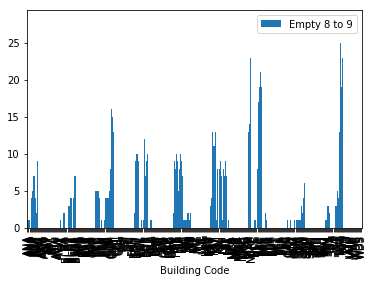

In [19]:
#This is what can happen if you try to plot too much data at once.
building_df.plot(x='Building Code', y='Empty 8 to 9', kind='bar')

In [ ]:
#Now we are condensing our building dataframe into a new one that will have a mean of the empty classrooms in a building
#in a week.

cond_build_cols = list(['Building Code', 'Empty 8 to 9', 'Empty 9 to 10','Empty 10 to 11','Empty 11 to 12','Empty 12 to 13', \
                   'Empty 13 to 14','Empty 14 to 15','Empty 15 to 16','Empty 16 to 17','Empty 17 to 18',])

cond_building_df = pd.DataFrame(index=[], columns=cond_build_cols)

In [ ]:
group_by_Building_bins = further_df.groupby('Building Code', as_index=False)

#Initialize building condensed data frame

for name,group in group_by_Building_bins:
    
    group_by_days_bins = group.groupby('Meeting Days', as_index=False)
    mini_list = [name, 0,0,0,0,0,0,0,0,0,0]
    df3 = pd.DataFrame([mini_list], columns=cond_build_cols)
    cond_building_df = cond_building_df.append(df3, ignore_index=True)

In [ ]:
cond_building_df.head()

In [ ]:
#Go thru, calculate mean of empty classes per schoolweek.
#Don't calculate weekend as it is rare and complicates calculations.

group_by_Building_bins = building_df.groupby('Building Code', as_index=False)



for name,group in group_by_Building_bins:
#     print(group)
#     if name == "ANA":
    if True:
        
        counter = 0
        for index, row in group.iterrows():
#             print(row)
            if(row['Day'] == 'Saturday' or row['Day'] == 'Sunday'):
                continue
            
            for i in range(8, 18):
#                 if(index == 1):
                if True:
                    temp_str = 'Empty ' + str(i) + ' to ' + str(i + 1)

                    selected_rows = cond_building_df.loc[ (cond_building_df['Building Code'] == row['Building Code'])]

#                     print(selected_rows)
                    curr_row = selected_rows[0:1]
                    #get index
                    bld_index = curr_row.index.values[0]
                    test2 = int(curr_row[temp_str]) + int(row[temp_str])

                    cond_building_df.set_value(bld_index,temp_str, test2)
                    
                    #If on last one, then divide value by 5 (number of days in schoolweek) to get average.
                    
                    if counter == len(group)-1:
                        test3 = int(curr_row[temp_str])
                        
                        mean = test3 / 5
                        
                        cond_building_df.set_value(bld_index,temp_str,mean)
                    
            counter = counter + 1
#                 print(row)
                

In [ ]:
print(cond_building_df)

In [ ]:
for i in range(8, 18):
    temp_str = 'Empty ' + str(i) + ' to ' + str(i + 1)
    cond_building_df.plot(x='Building Code', y=temp_str, kind='bar', figsize=(14,12))